<a href="https://colab.research.google.com/github/OFAslan/Python_Simple_Projects/blob/main/YS_ADS_June14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

data=pd.read_excel("/content/PZ_segmentasyon.xlsx")
data.head()

,cinsiyet,yas,il,semt,uyelik_tarihi,ilk_satın_alma,son_satın_alma,sipariş_adedi,toplam_harcama,toplam_indirim_tutarı
0,Erkek,35.0,İSTANBUL,SARIYER,2023-01-22,2023-02-26,2023-03-12,2,272.5,25
1,Kadın,32.0,İSTANBUL,ŞİŞLİ,2023-01-22,2023-01-22,2023-04-17,4,494.5,25
2,Erkek,19.0,İSTANBUL,ZEYTİNBURNU,2023-03-10,2023-03-26,2023-03-26,1,87.0,25
3,Erkek,27.0,İSTANBUL,BAŞAKŞEHİR,2023-03-07,2023-03-07,2023-03-07,1,50.5,25
4,Kadın,43.0,İSTANBUL,BEŞİKTAŞ,2023-01-15,2023-01-15,2023-01-15,1,47.0,25


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   cinsiyet               182 non-null    object        
 1   yas                    174 non-null    float64       
 2   il                     187 non-null    object        
 3   semt                   187 non-null    object        
 4   uyelik_tarihi          187 non-null    datetime64[ns]
 5   ilk_satın_alma         187 non-null    datetime64[ns]
 6   son_satın_alma         187 non-null    datetime64[ns]
 7   sipariş_adedi          187 non-null    int64         
 8   toplam_harcama         187 non-null    float64       
 9   toplam_indirim_tutarı  187 non-null    int64         
dtypes: datetime64[ns](3), float64(2), int64(2), object(3)
memory usage: 14.7+ KB


Ortalama yaş
Ortalama harcama


In [6]:
data.describe()

,yas,sipariş_adedi,toplam_harcama,toplam_indirim_tutarı
count,174.000000,187.000000,187.000000,187.000000
mean,39.293103,2.486631,566.147219,27.540107
std,12.874236,3.218492,980.933653,20.999033
min,10.000000,1.000000,45.000000,25.000000
25%,30.250000,1.000000,95.000000,25.000000
50%,37.000000,1.000000,202.500000,25.000000
75%,46.750000,2.000000,543.450000,25.000000
max,78.000000,29.000000,6331.250000,300.000000


<Axes: >

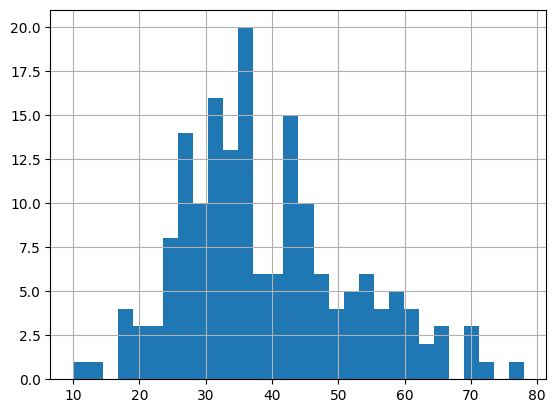

In [7]:
data["yas"].hist(bins=30)

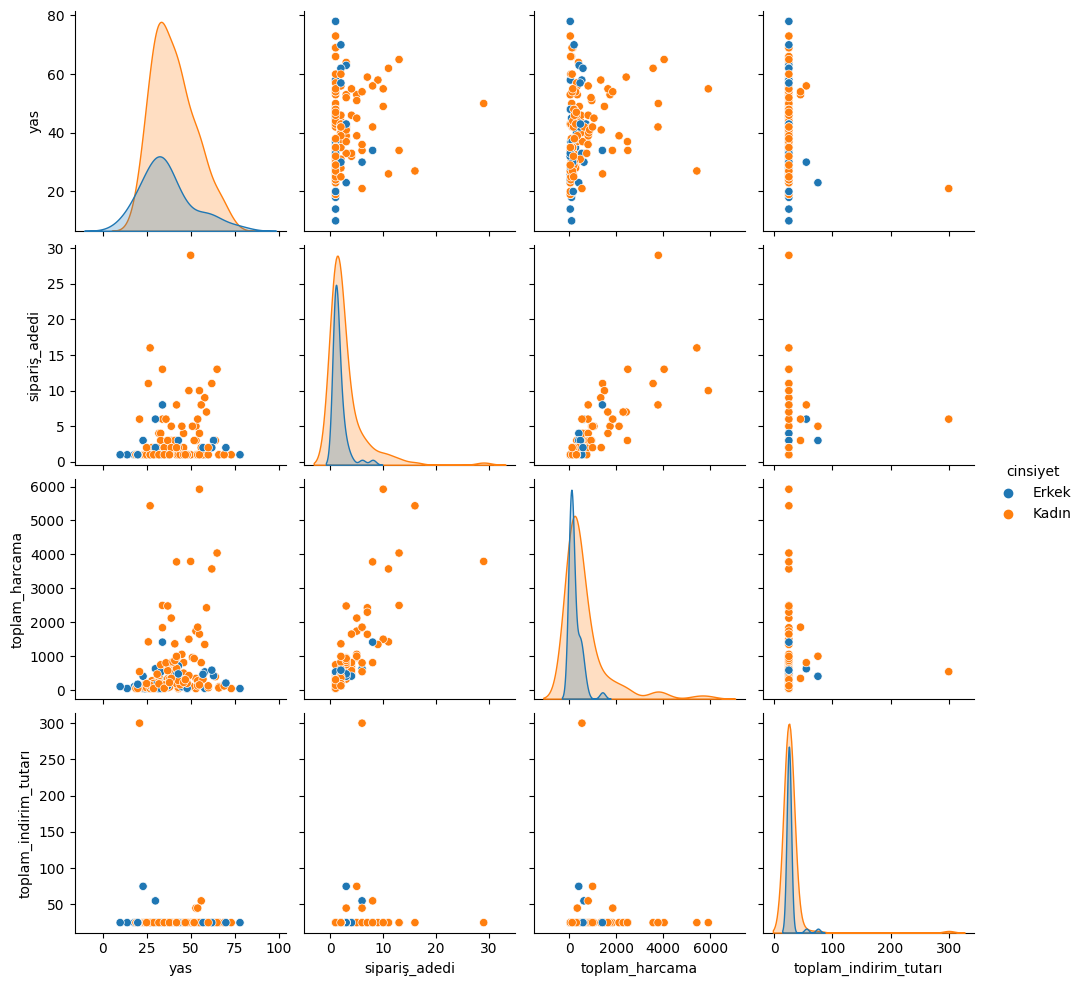

In [8]:
import seaborn as sns

sns.pairplot(data, hue="cinsiyet")

In [9]:
# AOV: Average Order Value

data["AOV"] = data["toplam_harcama"]/data["sipariş_adedi"]
data.AOV

0      136.2500
1      123.6250
2       87.0000
3       50.5000
4       47.0000
         ...   
182    498.2500
183    295.0000
184    309.0000
185     64.7500
186    472.5625
Name: AOV, Length: 187, dtype: float64

In [10]:
from datetime import datetime
import matplotlib.pyplot as plt

current_date = datetime(2023, 5, 2)
current_date

datetime.datetime(2023, 5, 2, 0, 0)

In [11]:
data["Total_Life_Time"] = current_date - data["uyelik_tarihi"]
data["Total_Life_Time"]

0     100 days
1     100 days
2      53 days
3      56 days
4     107 days
        ...   
182   102 days
183   114 days
184    97 days
185   115 days
186   112 days
Name: Total_Life_Time, Length: 187, dtype: timedelta64[ns]

(array([ 2.,  6.,  4.,  4.,  1.,  9.,  4., 13.,  7.,  7.,  6., 11.,  6.,
        16., 14., 12., 14., 15., 19., 17.]),
 array([ 21.,  26.,  31.,  36.,  41.,  46.,  51.,  56.,  61.,  66.,  71.,
         76.,  81.,  86.,  91.,  96., 101., 106., 111., 116., 121.]),
 <BarContainer object of 20 artists>)

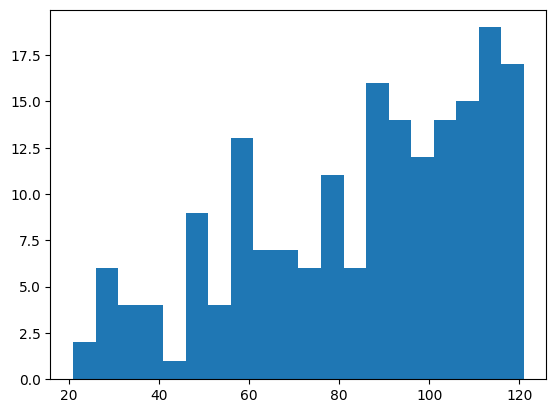

In [12]:
plt.hist(data["Total_Life_Time"].dt.days, bins=20)

<Axes: >

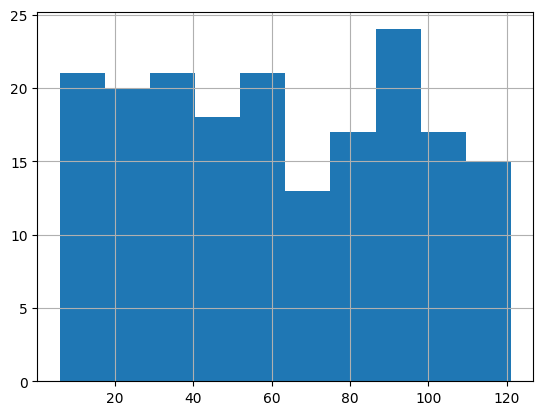

In [13]:
data["Recency"] = (current_date - data["son_satın_alma"]).dt.days
data["Recency"].hist()

<Axes: >

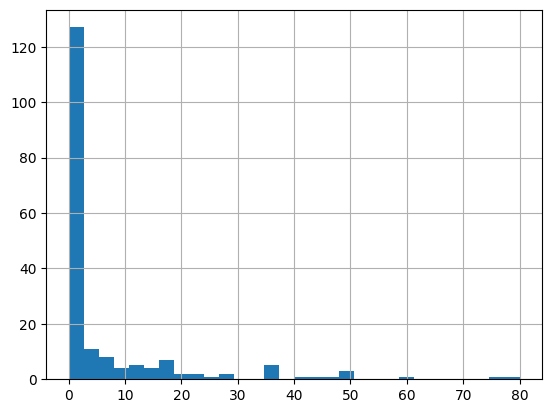

In [14]:
data["First_Order_Lag"] = (data["ilk_satın_alma"]-data["uyelik_tarihi"]).dt.days
data["First_Order_Lag"].hist(bins=30)

In [15]:
data["age_segment"] = pd.qcut(data["yas"], q=4)
data["age_segment"]

0       (30.25, 37.0]
1       (30.25, 37.0]
2      (9.999, 30.25]
3      (9.999, 30.25]
4       (37.0, 46.75]
            ...      
182     (37.0, 46.75]
183     (46.75, 78.0]
184     (46.75, 78.0]
185     (46.75, 78.0]
186     (37.0, 46.75]
Name: age_segment, Length: 187, dtype: category
Categories (4, interval[float64, right]): [(9.999, 30.25] < (30.25, 37.0] < (37.0, 46.75] <
                                           (46.75, 78.0]]

In [16]:
pd.pivot_table(data, values="AOV",index="age_segment", aggfunc="mean")

,AOV
age_segment,
"(9.999, 30.25]",108.855064
"(30.25, 37.0]",185.699105
"(37.0, 46.75]",247.111779
"(46.75, 78.0]",223.750893


In [17]:
pd.pivot_table(data, values="AOV",index="age_segment", aggfunc="count")

,AOV
age_segment,
"(9.999, 30.25]",44
"(30.25, 37.0]",49
"(37.0, 46.75]",37
"(46.75, 78.0]",44


<Axes: xlabel='age_segment'>

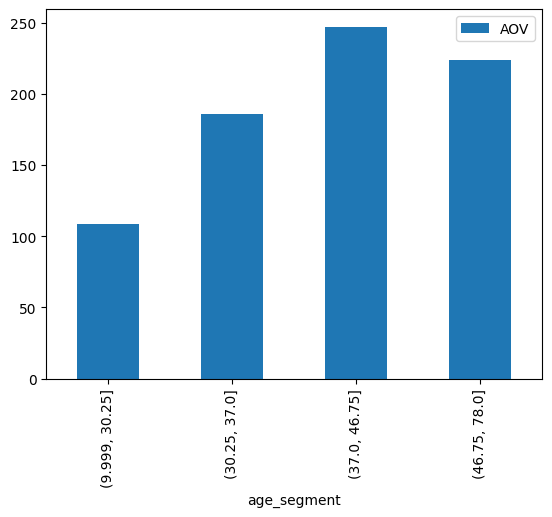

In [18]:
pd.pivot_table(data, values="AOV",index="age_segment", aggfunc="mean").plot(kind="bar")

In [19]:
pd.pivot_table(data, values="AOV",index="age_segment", columns="cinsiyet", aggfunc="mean")

cinsiyet,Erkek,Kadın
age_segment,,
"(9.999, 30.25]",94.377353,116.306646
"(30.25, 37.0]",136.139333,205.583317
"(37.0, 46.75]",201.750000,260.947930
"(46.75, 78.0]",169.120370,207.550175


In [20]:
pd.pivot_table(data, values="AOV",index="age_segment", columns="cinsiyet", aggfunc="count")

cinsiyet,Erkek,Kadın
age_segment,,
"(9.999, 30.25]",17,26
"(30.25, 37.0]",15,32
"(37.0, 46.75]",5,31
"(46.75, 78.0]",9,34


In [21]:
data.head()

,cinsiyet,yas,il,semt,uyelik_tarihi,ilk_satın_alma,son_satın_alma,sipariş_adedi,toplam_harcama,toplam_indirim_tutarı,AOV,Total_Life_Time,Recency,First_Order_Lag,age_segment
0,Erkek,35.0,İSTANBUL,SARIYER,2023-01-22,2023-02-26,2023-03-12,2,272.5,25,136.250,100 days,51,35,"(30.25, 37.0]"
1,Kadın,32.0,İSTANBUL,ŞİŞLİ,2023-01-22,2023-01-22,2023-04-17,4,494.5,25,123.625,100 days,15,0,"(30.25, 37.0]"
2,Erkek,19.0,İSTANBUL,ZEYTİNBURNU,2023-03-10,2023-03-26,2023-03-26,1,87.0,25,87.000,53 days,37,16,"(9.999, 30.25]"
3,Erkek,27.0,İSTANBUL,BAŞAKŞEHİR,2023-03-07,2023-03-07,2023-03-07,1,50.5,25,50.500,56 days,56,0,"(9.999, 30.25]"
4,Kadın,43.0,İSTANBUL,BEŞİKTAŞ,2023-01-15,2023-01-15,2023-01-15,1,47.0,25,47.000,107 days,107,0,"(37.0, 46.75]"


<Axes: >

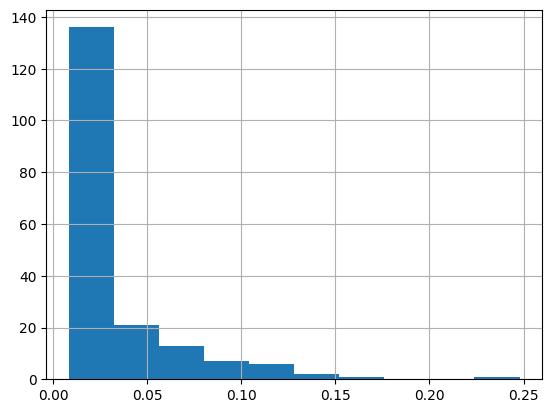

In [22]:
# RFM: Recency, Frequency, Monetary

""" 64 segment
4
3
2
1
"""

data["Frequency"] = data["sipariş_adedi"]/data["Total_Life_Time"].dt.days
data["Frequency"].hist()

In [23]:
data["R"] = pd.qcut(data["Recency"], q=4, labels=list(range(4,0,-1)))

In [24]:
data["T"] = pd.qcut(data["Recency"], q=4, labels=list("ABCD"))
data["T"]

0      B
1      A
2      B
3      B
4      D
      ..
182    B
183    C
184    D
185    D
186    A
Name: T, Length: 187, dtype: category
Categories (4, object): ['A' < 'B' < 'C' < 'D']

<Axes: >

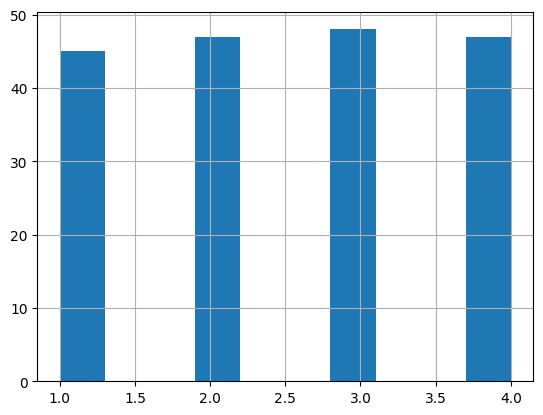

In [25]:
data["R"].hist()

<Axes: >

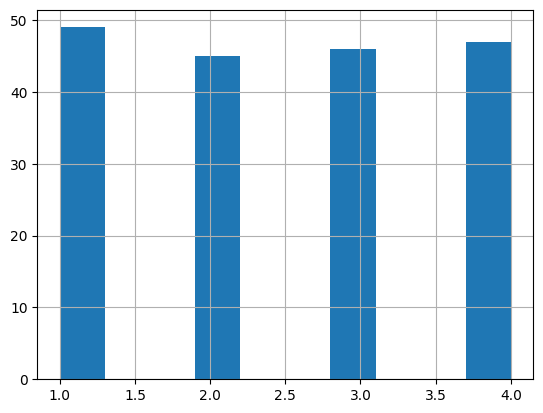

In [26]:
data["F"] = pd.qcut(data["Frequency"], q=4, labels=list(range(1,5)))
data["F"].hist()

<Axes: >

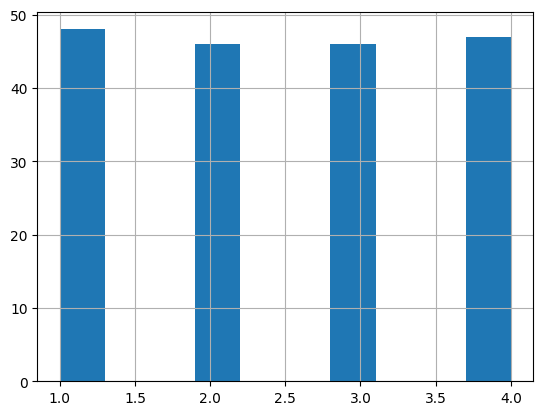

In [27]:
data["M"] = pd.qcut(data["toplam_harcama"], q=4, labels=list(range(1,5)))
data["M"].hist()

In [28]:
data.head()

,cinsiyet,yas,il,semt,uyelik_tarihi,ilk_satın_alma,son_satın_alma,sipariş_adedi,toplam_harcama,toplam_indirim_tutarı,AOV,Total_Life_Time,Recency,First_Order_Lag,age_segment,Frequency,R,T,F,M
0,Erkek,35.0,İSTANBUL,SARIYER,2023-01-22,2023-02-26,2023-03-12,2,272.5,25,136.250,100 days,51,35,"(30.25, 37.0]",0.020000,3,B,3,3
1,Kadın,32.0,İSTANBUL,ŞİŞLİ,2023-01-22,2023-01-22,2023-04-17,4,494.5,25,123.625,100 days,15,0,"(30.25, 37.0]",0.040000,4,A,4,3
2,Erkek,19.0,İSTANBUL,ZEYTİNBURNU,2023-03-10,2023-03-26,2023-03-26,1,87.0,25,87.000,53 days,37,16,"(9.999, 30.25]",0.018868,3,B,3,1
3,Erkek,27.0,İSTANBUL,BAŞAKŞEHİR,2023-03-07,2023-03-07,2023-03-07,1,50.5,25,50.500,56 days,56,0,"(9.999, 30.25]",0.017857,3,B,3,1
4,Kadın,43.0,İSTANBUL,BEŞİKTAŞ,2023-01-15,2023-01-15,2023-01-15,1,47.0,25,47.000,107 days,107,0,"(37.0, 46.75]",0.009346,1,D,1,1


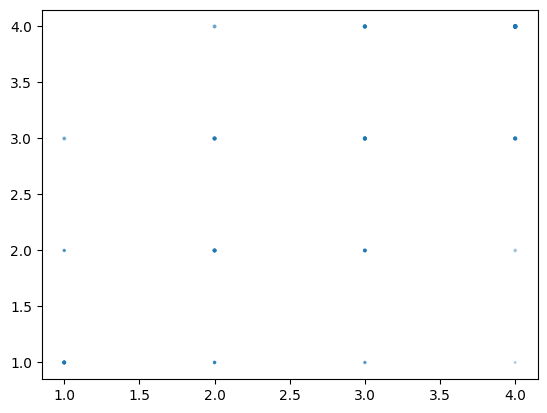

In [29]:
plt.scatter(data["R"], data["F"], s=data["M"], alpha=0.3)

In [30]:
pd.pivot_table(data, values="AOV",index=["M","R"], columns="F", aggfunc="count")

F     1   2  3   4
M R               
1 4   1   0  1   1
  3   2   6  7   0
  2   1  14  0   0
  1  15   0  0   0
2 4   0   0  1   1
  3   0   1  6   0
  2   3   9  3   0
  1  18   3  1   0
3 4   0   1  3   8
  3   1   3  9   2
  2   1   6  4   1
  1   7   0  0   0
4 4   0   0  4  26
  3   0   1  3   7
  2   0   1  3   1
  1   0   0  1   0

In [31]:
def join_rfm(x):
  return(str(x["R"])+str(x["F"])+str(x["M"]))

data["segment"] = data.apply(join_rfm, axis=1)
data["rfm_score"] = data[["R","F","M"]].sum(axis=1)
data.head()

,cinsiyet,yas,il,semt,uyelik_tarihi,ilk_satın_alma,son_satın_alma,sipariş_adedi,toplam_harcama,toplam_indirim_tutarı,...,Recency,First_Order_Lag,age_segment,Frequency,R,T,F,M,segment,rfm_score
0,Erkek,35.0,İSTANBUL,SARIYER,2023-01-22,2023-02-26,2023-03-12,2,272.5,25,...,51,35,"(30.25, 37.0]",0.020000,3,B,3,3,333,9
1,Kadın,32.0,İSTANBUL,ŞİŞLİ,2023-01-22,2023-01-22,2023-04-17,4,494.5,25,...,15,0,"(30.25, 37.0]",0.040000,4,A,4,3,443,11
2,Erkek,19.0,İSTANBUL,ZEYTİNBURNU,2023-03-10,2023-03-26,2023-03-26,1,87.0,25,...,37,16,"(9.999, 30.25]",0.018868,3,B,3,1,331,7
3,Erkek,27.0,İSTANBUL,BAŞAKŞEHİR,2023-03-07,2023-03-07,2023-03-07,1,50.5,25,...,56,0,"(9.999, 30.25]",0.017857,3,B,3,1,331,7
4,Kadın,43.0,İSTANBUL,BEŞİKTAŞ,2023-01-15,2023-01-15,2023-01-15,1,47.0,25,...,107,0,"(37.0, 46.75]",0.009346,1,D,1,1,111,3


In [32]:
x = data[["Frequency","AOV","Recency"]]

In [33]:
x.head()

,Frequency,AOV,Recency
0,0.020000,136.250,51
1,0.040000,123.625,15
2,0.018868,87.000,37
3,0.017857,50.500,56
4,0.009346,47.000,107


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)
X_scaled

array([[4.89799528e-02, 7.47185261e-02, 3.91304348e-01],
       [1.32452830e-01, 6.43807574e-02, 7.82608696e-02],
       [4.42550730e-02, 3.43909928e-02, 2.69565217e-01],
       [4.00364303e-02, 4.50358240e-03, 4.34782609e-01],
       [4.51309293e-03, 1.63766633e-03, 8.78260870e-01],
       [1.40378181e-02, 2.78403275e-02, 5.65217391e-01],
       [2.11798659e-03, 1.29785056e-01, 9.39130435e-01],
       [9.90754215e-03, 1.63766633e-01, 7.56521739e-01],
       [2.04234422e-02, 1.28556807e-01, 6.08695652e-01],
       [3.50678066e-02, 1.46980553e-01, 4.69565217e-01],
       [2.15925708e-01, 2.14397816e-01, 2.00000000e-01],
       [9.59334463e-02, 9.62128966e-02, 2.26086957e-01],
       [1.40870263e-01, 2.48352098e-01, 7.82608696e-02],
       [4.51309293e-03, 1.08085977e-01, 8.78260870e-01],
       [3.79738619e-03, 1.90788127e-01, 8.95652174e-01],
       [1.48561631e-01, 1.20941658e-01, 1.39130435e-01],
       [3.44929245e-03, 3.68474923e-03, 9.04347826e-01],
       [8.14416274e-02, 5.81371

In [36]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

In [40]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
SS_list = []
for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    SS_list.append(silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.4999733312399179
For n_clusters = 3 The average silhouette_score is : 0.4171913799199949
For n_clusters = 4 The average silhouette_score is : 0.4078780374402632
For n_clusters = 5 The average silhouette_score is : 0.43181328621904247
For n_clusters = 6 The average silhouette_score is : 0.37859384735226564
For n_clusters = 7 The average silhouette_score is : 0.3750428776866843
For n_clusters = 8 The average silhouette_score is : 0.3621917169739679
For n_clusters = 9 The average silhouette_score is : 0.3705225455548665
For n_clusters = 10 The average silhouette_score is : 0.34467051094807866


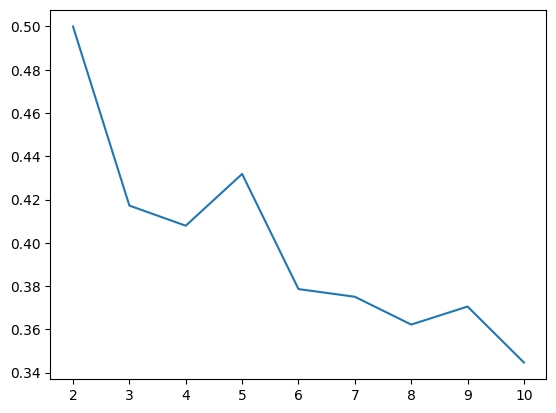

In [41]:
plt.plot(range_n_clusters, SS_list) #5 te bir yükseliş oldu muhtemelen 5 cluster seçmek uygun olacaktır.

In [48]:
clusterer5 = KMeans(n_clusters=5, n_init="auto", random_state=10)
cluster_labels = clusterer5.fit_predict(X_scaled)

In [49]:
data["cluster"] = cluster_labels

In [51]:
pd.pivot_table(data, values="Recency",index="cluster", columns="cinsiyet", aggfunc="mean")

cinsiyet,Erkek,Kadın
cluster,,
0,57.857143,61.631579
1,99.384615,98.473684
2,23.000000,26.358974
3,11.000000,16.200000
4,NaN,44.333333


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


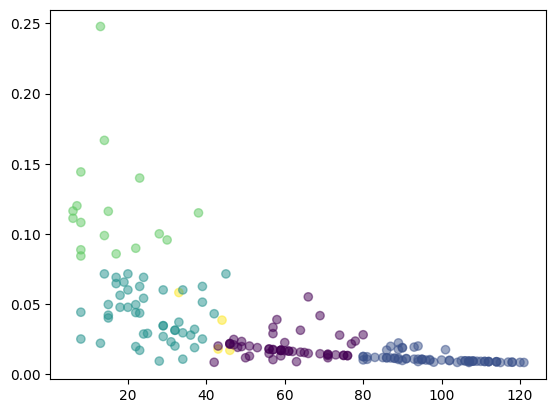

In [52]:
plt.scatter(data["Recency"],data["Frequency"], c=data["cluster"], alpha=0.5)

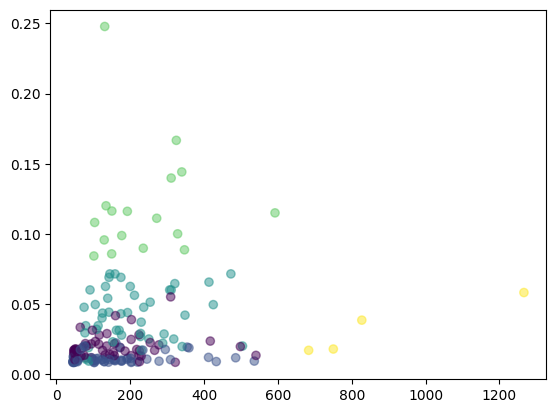

In [53]:
plt.scatter(data["AOV"],data["Frequency"], c=data["cluster"], alpha=0.5)

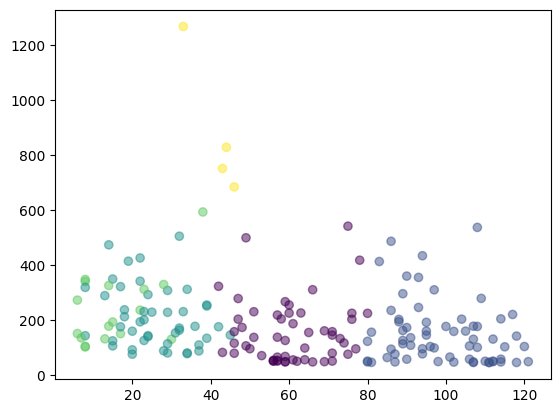

In [54]:
plt.scatter(data["Recency"],data["AOV"], c=data["cluster"], alpha=0.5)